# Devasy Patel
# Practical 10
# Deep Learning 
## Tasks
-  Auto Encoders for Dimensionality Reduction

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.2511 - val_loss: 0.1731
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1587 - val_loss: 0.1434
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1367 - val_loss: 0.1275
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1252 - val_loss: 0.1203
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1196 - val_loss: 0.1162
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1155 - val_loss: 0.1124
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1120 - val_loss: 0.1091
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1092 - val_loss: 0.1067
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1068 - val_loss: 0.1049
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1048 - val_loss: 0.1028

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


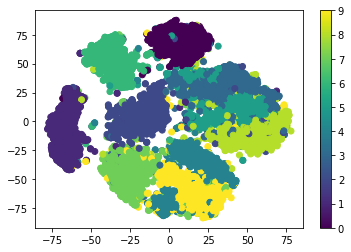

In [1]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Evaluate the autoencoder
decoded_imgs = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - decoded_imgs, 2), axis=1)
print('Mean Squared Error: ', np.mean(mse))

# Visualize the compressed representation of the input data
encoder = Model(input_img, encoded)
x_test_encoded = encoder.predict(x_test)
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test_encoded)
plt.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_test)
plt.colorbar()
plt.show()


Display Reconstruction of Images from MNIST Dataset

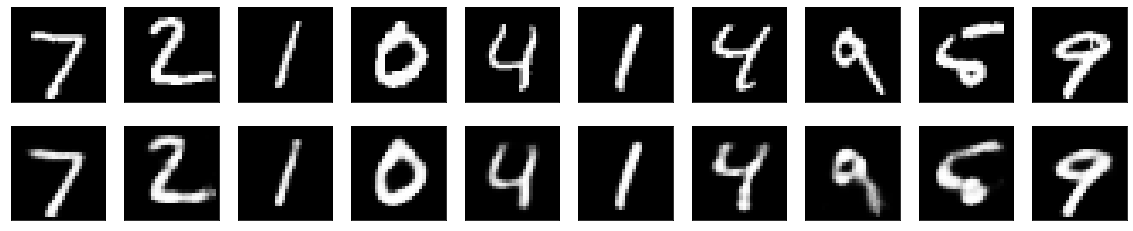

In [2]:
# display encoded image
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

Display the worst 10 encoded images in the dataset

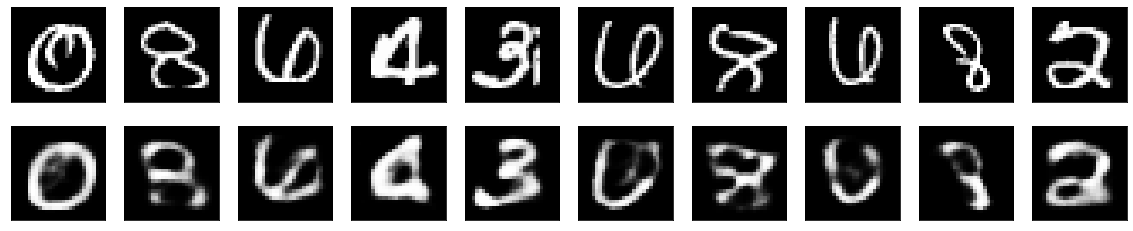

In [3]:
# display worst 10 images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[mse.argsort()[::-1][i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[mse.argsort()[::-1][i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# Best encoded images

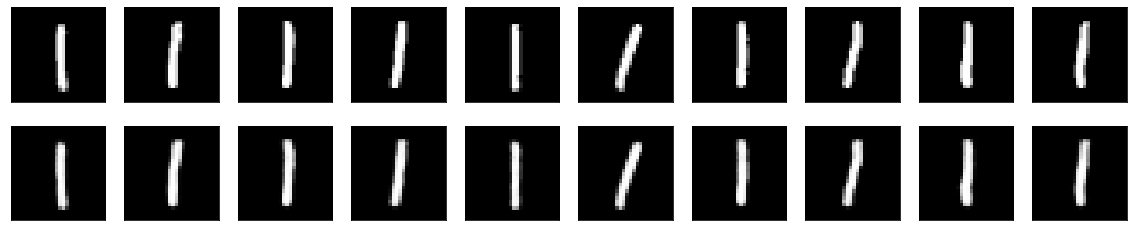

In [4]:
# display best 10 images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[mse.argsort()[i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[mse.argsort()[i]].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()